<!--NAVIGATION-->
< | [Main Contents](https://vectorbite.github.io/VBiTraining2/) | >

# Model Fitting in (Vector-Borne Disease) Ecology and Evolution: Challenge problems <span class="tocSkip">

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-Traits-Challenge" data-toc-modified-id="The-Traits-Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The Traits Challenge</a></span><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The Data</a></span></li><li><span><a href="#Guidelines" data-toc-modified-id="Guidelines-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Guidelines</a></span></li></ul></li><li><span><a href="#The-Extended-Traits-Challenge" data-toc-modified-id="The-Extended-Traits-Challenge-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The <em>Extended</em> Traits Challenge</a></span></li><li><span><a href="#An-abundances-challenge" data-toc-modified-id="An-abundances-challenge-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>An abundances challenge</a></span></li><li><span><a href="#Time-Series-Challenge" data-toc-modified-id="Time-Series-Challenge-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Series Challenge</a></span><ul class="toc-item"><li><span><a href="#The-Data" data-toc-modified-id="The-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Data</a></span></li><li><span><a href="#Guidelines" data-toc-modified-id="Guidelines-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Guidelines</a></span></li></ul></li><li><span><a href="#The-Open-Challenge" data-toc-modified-id="The-Open-Challenge-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The Open Challenge</a></span></li></ul></div>

# The Traits Challenge

You will work in groups to tackle this "Challenge" problem. 

The main objective is to fit alternative models to data using Maximum Likelihood and compare/select between them. Your goal is not just to practise model fitting and selection, but also to extract biological insights from it. 

**_You will present the results of your analysis and biological inferences during the group discussion session_**. 

Good luck!
  
## The Data

The data for this question consist of thermal traits for *Aedes agypti* mosquitos found in the data file ` AeaegyptiTraitData.csv`. 

There are four possible traits (as well as some data that are recorded as the inverse trait, which we ignore for now):

- pEA: proportion surviving from egg to adulthood  
- MDR: mosquito development rate  
- PDR: parasite development rate (= 1/EIP the extrinsic incubation period)  
- $\mu$ (mu): death rate (= 1/longevity)

You will choose one of these four traits and fit a curve to the data using maximum likelihood. You may also fit  models to data of your choosing.

Base your code on what was provided in the lecture/practical portion of the class. You will start with a specific set of tasks to accomplish, starting with easy ones through to more challenging ones. 

First read in the data and look at the summary.

In [1]:
dat<-read.csv(file="../data/AeaegyptiTraitData.csv")
summary(dat)

 trait.name       T             trait         
 1/mu:18    Min.   : 1.00   Min.   : 0.00000  
 EIP :27    1st Qu.:20.00   1st Qu.: 0.03044  
 MDR :29    Median :26.67   Median : 0.13587  
 mu  :12    Mean   :26.41   Mean   : 5.14394  
 PDR :12    3rd Qu.:32.00   3rd Qu.: 6.00000  
 pEA :55    Max.   :52.00   Max.   :40.54000  
                                              
                                     ref          trait2    trait2.name 
 Eisen_et_al_2014                      :31   Karachi :  6   EIP50 :  4  
 Beserra_2009                          :18   Surabaya:  6   Strain: 18  
 Kamimura_et_al_2002_JapanSocMedEnt&Zoo:18   Timor   :  6   NA's  :131  
 Tun-Lin_et_al_2000_MedVetEnto         :13   NA's    :135               
 Rueda_et_al_1990_EntSocAm             :12                              
 Yang_et_al_2008_EpidInfect            :12                              
 (Other)                               :49                              

Nexts plot the response output, `trait` across temperature, `T`:

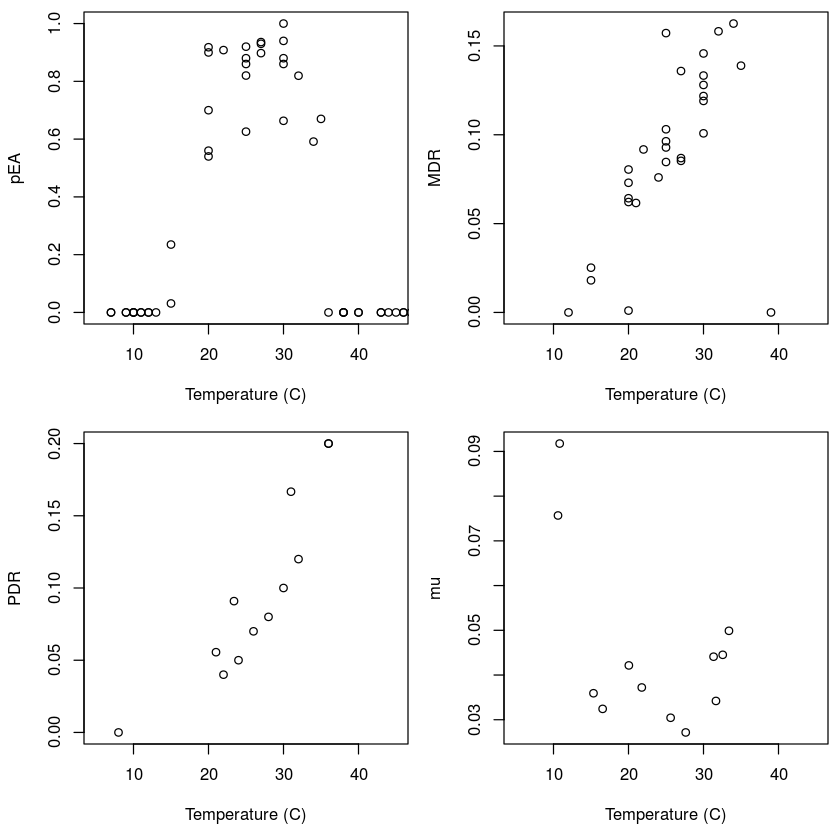

In [2]:
traits<-c("pEA", "MDR", "PDR", "mu")
par(mfrow=c(2,2), bty="o", mai=c(0.8,0.7,0.1,0.1))
for(i in 1:4){ 
    d.temp<-subset(dat, trait.name==traits[i])
    plot(trait ~ T, data=d.temp, xlab="Temperature (C)", ylab=traits[i], xlim=c(5, 45))
}

## Guidelines

We suggest the following steps for your analysis. 

**(1) Fitting a linear model, revisited**

* Using the [`nll.slr`](#Implementing-the-Likelihood-in-R) function and the code you wrote above, find the MLEs of the slope and intercept (i.e., find the best fitting line for your chosen trait). 
* Plot your data with the fitted line.
* Plot the likelihood surface for $b_0$ and $b_1$ and indicate the MLEs your likelihood surface. 
* Obtain confidence intervals for your estimates. 

**(2) Fitting a non-linear model**

* Choose a non-linear model to fit to your trait (e.g., the quadratic, Briere from [above](#Two-thermal-performance-curve-models)). We have implemented some functions in the file `temp_functions.R` that can be found in the `code` directory. 
* Using the [`nll.slr`](#Implementing-the-Likelihood-in-R) function as an example, write your own function that calculates the negative log likelihood as a function of the parameters describing your trait and any additional parameters you need for an appropriate noise distribution (e.g., $\sigma$ if you have normal noise).
* Use the `optim()` function to find the MLEs of all of your parameters.
* Obtain a confidence interval for your estimate.
* Plot the fitted function with the data and your fittend line from Task 1.
* Do all of these with a second (linear or non-linear) function fited to your trait data. Find the MLEs and fit this curve to your data. 
* Plot both the fits on the data.

**(3) Compare models**

Now compare your models (e.g., AIC, BIC, LRT). Optionally, also calculate the relative model probabilities). Which comes out on top? Is this what you expected? What biological inferences can you draw from the results?

**_Extra challenge_**

If you have the time and the interest you may try to fit curves to all of the 4 traits in the data!

# The *Extended* Traits Challenge

Perform a Bayesian analysis for the same *Aedes agypti* mosquito traut data in ` AeaegyptiTraitData.csv`. 

Here you will perform model selection with DIC, as explained in the Intro to Bayesian Stats [lecture](https://github.com/vectorbite/VBiTraining2/tree/master/lectures).  

# An abundances challenge

Fit some real data to the population growth models you were [introduced to previously](). These data have been generated/collected by [Tom Smith](https://mhasoba.pythonanywhere.com/pawarlab/default/people), a PhD student at Silwood as part of his Dissertation research. Import the [dataset](https://github.com/vectorbite/VBiTraining2/blob/master/data/example_growth_data.csv) into R: 

In [3]:
BacData <- read.csv("../data/example_growth_data.csv")

head(BacData)
tail(BacData)

ID,bacterial_genus,replicate,trait_name,trait_value,hour
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),5.301030,0
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),5.301030,5
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),6.991226,10
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),8.094820,15
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),8.358316,20
Sch_AE103_02,Flavobacterium,1,Log(cells/mL),8.460296,25


,ID,bacterial_genus,replicate,trait_name,trait_value,hour
963,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.086360,25
964,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.322219,30
965,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.361728,35
966,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.322219,40
967,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.260071,45
968,Wil_SP04_02,Bacillus,4,Log(cells/mL),7.292256,50


The column `trait_value` and `hour` are your variables of interest (log cell density and time), respectively. Note that the `ID` column will tell you which rows represent one separate growth experiment.  Make sure you have a good look at the data first by plotting them up (idealy, in a loop).  

1. Fit the above population growth rate models, and perform model selection on them. Which model fits best? 
* Can you think of a difefrent model to fit? If so, implement it, and compare that as well. 
* Write the analysis as a single self-standing R script, which will run and return the results in a `*.csv` file and plot(s) ins pdf.
* Again, consider using ggplot insted of base plotting.

# Time Series Challenge

Just like the [traits challenge](#The-Traits-Challenge), will work in groups to tackle this second "Challenge" problem. 

The main objective is to perform a time series analysis on some a disease incidence dataset and compare different models. Your goal is not just to practise model fitting and selection, but also to extract biological insights from it. 

**_You will present the results of your analysis and biological inferences during the group discussion session_**. 

Good luck!


## The Data

The data consist of time series of dengue case data from San Juan, Puerto Rico together with environmental data for each location across a number of transmission seasons. The file is `combined_sanjuan_new.csv`. Detailed descriptions of the data are available [here]( http://dengueforecasting.noaa.gov/). 

To operate effectively, health departments must be able to predict weekly cases, as this will correspond to hospital demand and resources. 

Your task is to provide a fitted model for forecasting weekly total dengue cases in San Juan. You can use autoregressive components and sine/cosine trends to build your model. You can also use the environmental covariates. Remember that you want to be able to predict into the future so you will only include lagged predictors into your prediction model. Below we suggest a series of steps for the analysis and then you'll have the opportunity to develop your own model(s) and choose which components that you want to keep. We'll compare models during the group discussion. 

Here is some code to get you started.

First read in the data and look at the summary:

In [4]:
sanjuan<-read.csv(file="../data/combined_sanjuan_new.csv")
head(sanjuan)
summary(sanjuan)

season,season_week,year_week,week_start_date,weekID,monthID,year,denv1_cases,denv2_cases,denv3_cases,⋯,tmin,tmax,prec,dtr,tavg,nino12,nino34,soi,pop,adjpop
1990/1991,1,18,4/30/1990,199018,199004,1990,0,0,0,⋯,296.4,300.7,16.64,2.385714,298.2643,25.22,28.93,0.3,2217968,2226511
1990/1991,2,19,5/7/1990,199019,199005,1990,0,0,0,⋯,297.3,300.9,22.90,2.242857,298.9929,24.05,28.96,2.0,2217968,2227014
1990/1991,3,20,5/14/1990,199020,199005,1990,0,0,0,⋯,297.0,301.1,18.50,2.442857,299.0643,24.05,28.96,2.0,2217968,2227516
1990/1991,4,21,5/21/1990,199021,199005,1990,0,0,0,⋯,297.5,301.9,7.30,3.085714,299.6857,24.05,28.96,2.0,2217968,2228019
1990/1991,5,22,5/28/1990,199022,199005,1990,0,0,0,⋯,298.1,302.4,25.19,2.200000,299.8714,24.05,28.96,2.0,2217968,2228521
1990/1991,6,23,6/4/1990,199023,199006,1990,1,0,0,⋯,297.7,301.1,44.70,1.900000,299.0929,22.68,28.94,0.5,2217968,2229024


       season     season_week      year_week      week_start_date
 1990/1991: 52   Min.   : 1.00   Min.   : 1.00   10/1/1990:  1   
 1991/1992: 52   1st Qu.:13.75   1st Qu.:13.75   10/1/1991:  1   
 1992/1993: 52   Median :26.50   Median :26.50   10/1/1993:  1   
 1993/1994: 52   Mean   :26.50   Mean   :26.50   10/1/1994:  1   
 1994/1995: 52   3rd Qu.:39.25   3rd Qu.:39.25   10/1/1995:  1   
 1995/1996: 52   Max.   :52.00   Max.   :52.00   10/1/1997:  1   
 (Other)  :676                                   (Other)  :982   
     weekID          monthID            year       denv1_cases    
 Min.   :199018   Min.   :199004   Min.   :1990   Min.   : 0.000  
 1st Qu.:199505   1st Qu.:199501   1st Qu.:1995   1st Qu.: 0.000  
 Median :199944   Median :199910   Median :1999   Median : 0.000  
 Mean   :199959   Mean   :199939   Mean   :1999   Mean   : 1.389  
 3rd Qu.:200430   3rd Qu.:200407   3rd Qu.:2004   3rd Qu.: 1.000  
 Max.   :200917   Max.   :200904   Max.   :2009   Max.   :27.000  
   

Next plot the response output, `total_cases` across time:

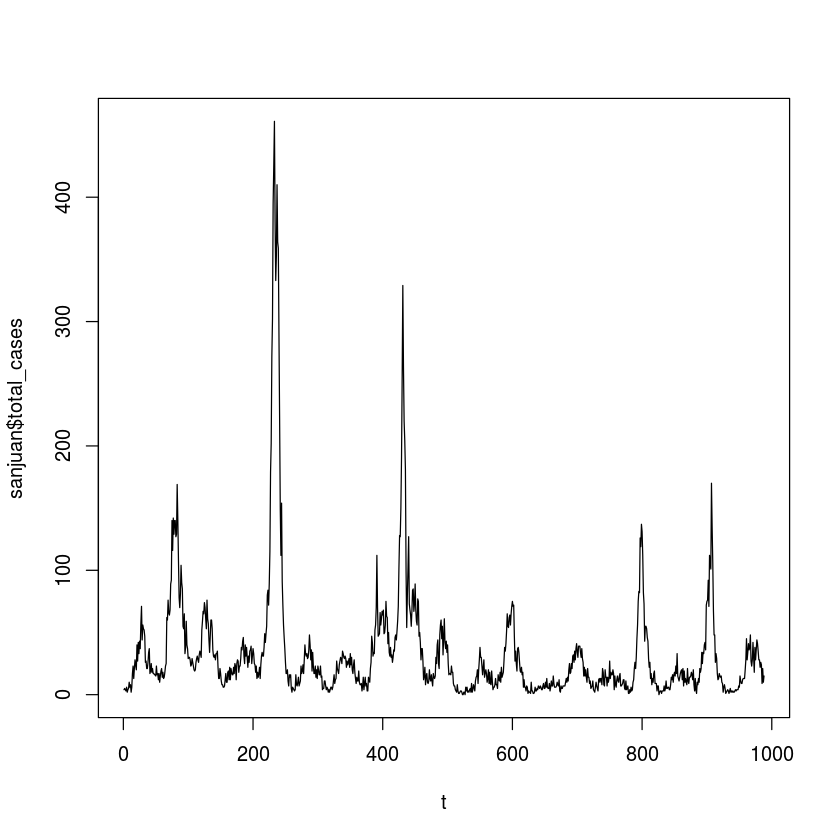

In [5]:
t<-seq(1, length(sanjuan$total_cases))
plot(t, sanjuan$total_cases, type="l")

It may be a little hard to tell, but when you have a lot of cases, the variance is higher, too. As in the [airline time series example](#Airline_TS), we need to make a data transformation. However, we have zeros in the total cases, so instead of a log we'll use a square-root:

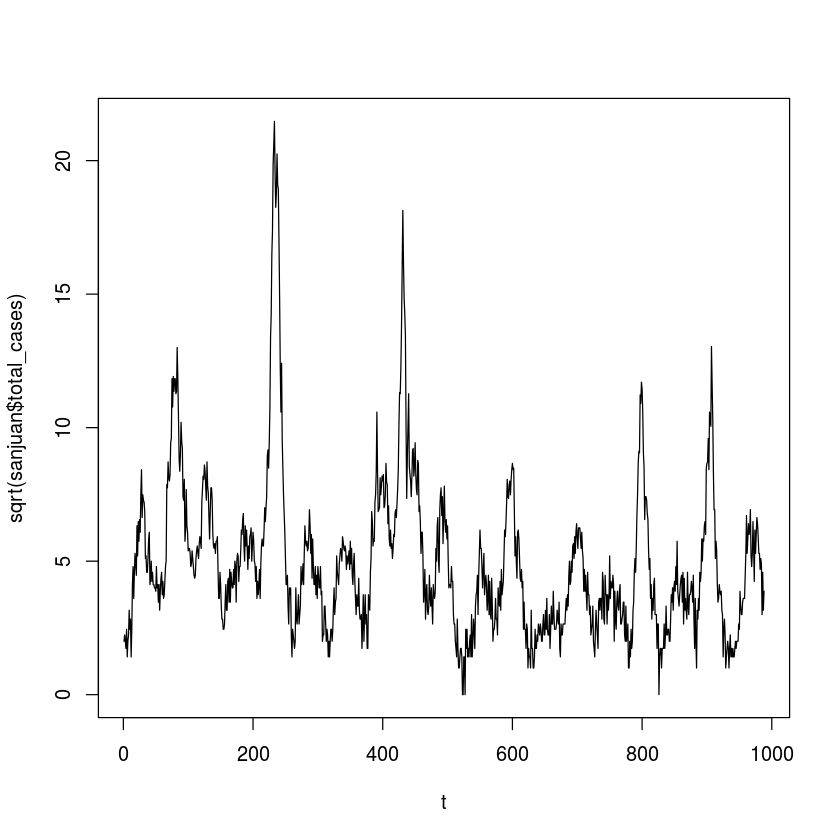

In [6]:
t<-seq(1, length(sanjuan$total_cases))
plot(t, sqrt(sanjuan$total_cases), type="l")

And the ACF plot:

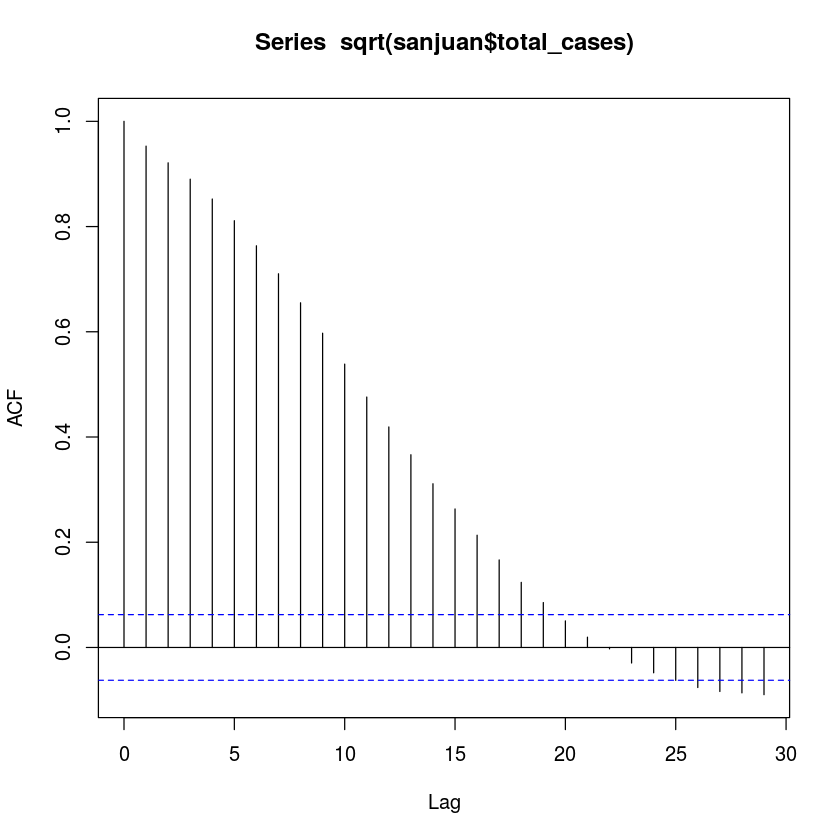

In [7]:
acf(sqrt(sanjuan$total_cases))

*What do you notice about the ACF? What does this tell you about terms you might want to include in your regression analysis?*

If you were to look at your covariates, you'd notice that there's a lot of correlation between things like average and max or min temperature and population and the adjusted population. Thus, we don't want to include absolutely everything here. Instead, we're going to select a subset of covariates here. As always, it's a good idea to build a new data frame with the subset of covariates that you want to explore. We start with the sqrt of cases as your response, AR1 of the sqrt response, a trend, and sine/cosine with a 52 week period together with a subset of the environmental covariates at 1 week lags. (As an aside, temperature, precipitation, etc, will be correlated with the sine/cosine terms.)

In [8]:
n<-max(t)
YX <- data.frame(sqrty=sqrt(sanjuan$total_cases)[2:n],
                 sqrty.m1=sqrt(sanjuan$total_cases)[1:(n-1)],
                 t=t[2:n],
                 sin1=sin((2:n)*2*pi/52),
                 cos1=cos((2:n)*2*pi/52),
                 season=sanjuan$season[2:n],
                 w=sanjuan$season_week[2:n],
                 lpop.m1=log(sanjuan$adjpop+1)[1:(n-1)],
                 lp.m1=log(sanjuan$prec+1)[1:(n-1)],
                 tavg.m1=sanjuan$tavg[1:(n-1)],
                 ndvi45.m1=sanjuan$NDVI.18.45.66.14.[1:(n-1)],
                 ndvi50.m1=sanjuan$NDVI.18.50..66.14.[1:(n-1)],
                 nino12.m1=sanjuan$nino12[1:(n-1)],
                 soi.m1=sanjuan$soi[1:(n-1)])

## Guidelines

We suggest the following steps for your analysis. 

**(1) Hypotheses**

Before you start, think about which things you expect to be good predictors of dengue transmission. Think of 2 or 3 hypotheses and write down a (linear) model to represent the mathematical form of the hypothesis.

**(2) Fitting and analyzing a first model**

Fit a linear model to the square-root response with the trend, and sine/cosine components, ONLY. Then you'll evaluate the model. Following the examples in the lecture, plot the residuals over time and the ACF of the residuals. Also plot the data together with the predicted values (e.g., the _fitted_ values from your model). Examine your summary -- are all of the coefficiants significantly different from zero; what is your R$^2$ value? Based on the combination of residual diagnositcs and summaries, are you satisfied with this model?

**(3) Building a comparison model**

Build a second model by adding in the AR-1 component. Again examine your summaries, residual diagnostics, and predictions. How do you think this model compares to the first one? You may also want to try building boxplots of residuals by week in the season and see if there are any patterns, similarly to the airline example.

**(4) Including environmental components**

By trial and error (or if you know another way, such as the step function) try to build a better model that includes at least one environmental covariate while staying parsimonious. Again check your diagnostics, etc.

**(5) Comparing models**

Now compare your 3 models via BIC (optional: calculate the relative model probabilities). Which comes out on top? Is this what you expected? What biological insights have you gained?


**_Extra challenge_**

For convenience we simply chose a lag of 1 week when we built the data set. However, the lag time between an infected human, and another human getting  infected is likely to be multiple weeksbecause of the various incubation and development times in the human and the mosquito. To examine the lags at which the covariates are most related to the response, we can use the cross-correlation function (ccf). For instance:b

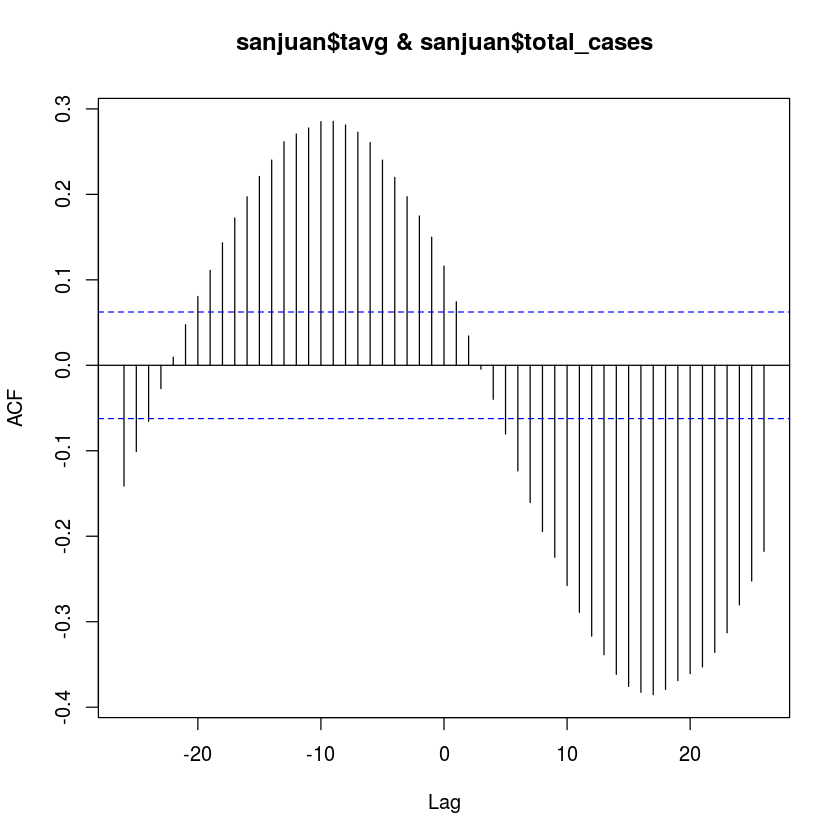

In [9]:
ccf(sanjuan$tavg, sanjuan$total_cases)

This indicates that the temperature about 10 weeks back is more correlated with the incidence than the temperature 1 week ago. 

Plot a few other ccfs, choose some alternative lags, and build a NEW dataset with these lagged variables. Then build a few models (perhaps starting again from the simple versions without environmental covariates), and compare them. Does including the extra information about lags seem to improve fit?

# The Open Challenge

Finally, in groups you will develop and analyze data from VecTraits or VecDyn using one or more of the methods you have learned till now. 
